#### Libraries

In [1]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

#display the graphs
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 200)

### Reading Dataset


In [2]:
#read the csv file into a dataframe
cleaned_df = pd.read_csv('/Users/drushti/Documents/PythonProject/CitiBike/cleaned_df.csv')

In [3]:
#Creating GeoDataFrame for Start Station
gdf_start = gpd.GeoDataFrame(
    cleaned_df, geometry=gpd.points_from_xy(cleaned_df['start_lng'], cleaned_df['start_lat']), crs="EPSG:4326")
gdf_start.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,startweekday,endweekday,starttime,endtime,month,tripduration,geometry
0,D68047AAA9A72501,classic_bike,2022-08-12 18:14:45,2022-08-12 18:21:23,Columbus Drive,JC014,Hamilton Park,JC009,40.718355,-74.038914,40.727596,-74.044247,member,Friday,Friday,18,18,August,6.63,POINT (-74.03891 40.71836)
1,E5B82A9F588A7650,classic_bike,2022-08-19 01:04:39,2022-08-19 01:14:10,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,8 St & Washington St,HB603,40.736982,-74.027781,40.745984,-74.028199,member,Friday,Friday,1,1,August,9.52,POINT (-74.02778 40.73698)


In [4]:
#Creating GeoDataFrame for End Station
gdf_end = gpd.GeoDataFrame(
    cleaned_df, geometry=gpd.points_from_xy(cleaned_df['end_lng'], cleaned_df['end_lat']), crs="EPSG:4326")
gdf_end.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,startweekday,endweekday,starttime,endtime,month,tripduration,geometry
0,D68047AAA9A72501,classic_bike,2022-08-12 18:14:45,2022-08-12 18:21:23,Columbus Drive,JC014,Hamilton Park,JC009,40.718355,-74.038914,40.727596,-74.044247,member,Friday,Friday,18,18,August,6.63,POINT (-74.04425 40.72760)
1,E5B82A9F588A7650,classic_bike,2022-08-19 01:04:39,2022-08-19 01:14:10,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,8 St & Washington St,HB603,40.736982,-74.027781,40.745984,-74.028199,member,Friday,Friday,1,1,August,9.52,POINT (-74.02820 40.74598)


In [5]:
#Reading shape file for NJ boundary
nj_map = gpd.read_file('/Users/drushti/Documents/PythonProject/CitiBike/nj.geojson')
nj_map.head(1)

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,34,08310,3408310,B5,G6350,S,29319262,81477,+39.5313447,-074.8966229,N,"POLYGON ((-74.90618 39.54636, -74.91191 39.536..."


In [6]:
#EXTRACTING ZIPCODE AND GEOMETRY POINTS IN SEPERATE DATAFRAME
# ZCTA and zipcodede = https://help.healthycities.org/hc/en-us/articles/115006016767-What-is-the-difference-between-ZIP-Codes-and-ZCTAs-#:~:text=ZCTAs%20or%20ZIP%20Code%20Tabulation,same%20as%20its%20ZIP%20Code.
nj_map = nj_map[['ZCTA5CE10','geometry']]
nj_map.rename(columns={'ZCTA5CE10':'zipcode'},inplace=True)

#### SPATIAL JOIN - START STATION ZIPCODE

In [7]:
#Spatial Join on Geodataframe - https://geopandas.org/en/stable/gallery/spatial_joins.html

In [8]:
#PERFORMING SPATIAL JOINM TO MATCH START STATION ID WITH RESPECTIVE ZIPCODE
trip_start = gdf_start.sjoin(nj_map,how='left')
trip_start.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,startweekday,endweekday,starttime,endtime,month,tripduration,geometry,index_right,zipcode
0,D68047AAA9A72501,classic_bike,2022-08-12 18:14:45,2022-08-12 18:21:23,Columbus Drive,JC014,Hamilton Park,JC009,40.718355,-74.038914,...,member,Friday,Friday,18,18,August,6.63,POINT (-74.03891 40.71836),414.0,07302


In [9]:
zip_null = trip_start[trip_start['zipcode'].isna()]
print(zip_null.shape)
zip_null['start_station_id'].value_counts()

(76, 22)


start_station_id
JC002      31
JC106       6
JC098       2
HB303       2
HB102       2
4824.03     1
7059.01     1
5922.04     1
5500.07     1
HB101       1
JC104       1
HB404       1
7123.04     1
6224.05     1
HB402       1
HB103       1
6889.12     1
HB607       1
5329.08     1
8262.07     1
8226.06     1
4617.01     1
5820.08     1
6659.09     1
5626.13     1
6560.15     1
8254.01     1
5065.14     1
4850.04     1
5616.01     1
6948.10     1
6747.07     1
6779.05     1
5065.04     1
5905.14     1
6756.05     1
5436.09     1
JC116       1
Name: count, dtype: int64

In [10]:
#### dropping rows with missing zipcode
ts_cleaned = trip_start.copy()
ts_cleaned.dropna(axis=0,inplace=True)
ts_cleaned.shape

(945267, 22)

#### SPATIAL JOIN - END STATION ZIPCODE

In [11]:
#PERFORMING SPATIAL JOIN TO MATCH END STATION ID WITH RESPECTIVE ZIPCODE
trip_end = gdf_end.sjoin(nj_map, how='left')
trip_end.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,startweekday,endweekday,starttime,endtime,month,tripduration,geometry,index_right,zipcode
0,D68047AAA9A72501,classic_bike,2022-08-12 18:14:45,2022-08-12 18:21:23,Columbus Drive,JC014,Hamilton Park,JC009,40.718355,-74.038914,...,member,Friday,Friday,18,18,August,6.63,POINT (-74.04425 40.72760),414.0,07302
1,E5B82A9F588A7650,classic_bike,2022-08-19 01:04:39,2022-08-19 01:14:10,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,8 St & Washington St,HB603,40.736982,-74.027781,...,member,Friday,Friday,1,1,August,9.52,POINT (-74.02820 40.74598),549.0,07030
2,AA0DBFF220DA98F6,classic_bike,2022-08-21 13:43:05,2022-08-21 13:53:13,Columbus Drive,JC014,Montgomery St,JC099,40.718355,-74.038914,...,member,Sunday,Sunday,13,13,August,10.13,POINT (-74.05099 40.71942),414.0,07302
3,8F11D340492FCD32,electric_bike,2022-08-04 22:02:12,2022-08-04 22:21:31,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,Pershing Field,JC024,40.736982,-74.027781,...,member,Thursday,Thursday,22,22,August,19.32,POINT (-74.05179 40.74268),491.0,07307
4,48FF219B87E90004,electric_bike,2022-08-08 14:02:48,2022-08-08 14:16:11,Columbus Drive,JC014,Fairmount Ave,JC093,40.718355,-74.038914,...,member,Monday,Monday,14,14,August,13.38,POINT (-74.07196 40.72573),330.0,07306


In [12]:
end_zipnull = trip_end[trip_end['zipcode'].isnull()]
print(end_zipnull.shape)
end_zipnull['end_station_id'].value_counts()

(1401, 22)


end_station_id
5297.02    95
5470.10    61
5561.06    49
5065.10    45
5470.12    36
           ..
4060.09     1
5752.09     1
4243.01     1
6644.08     1
5128.04     1
Name: count, Length: 331, dtype: int64

In [13]:
#### dropping rows with missing zipcode
te_cleaned = trip_end.copy()
te_cleaned.dropna(axis=0,inplace=True)
te_cleaned.shape

(943942, 22)

In [14]:
#Renaming zipcode as start and end
te_cleaned.rename(columns={'zipcode':'zip_end'}, inplace = True)
ts_cleaned.rename(columns={'zipcode':'zip_start'}, inplace = True)

### POINT MAP OF TRIPS FROM START STATION

In [54]:
start_zones = ts_cleaned.dissolve(
     by="start_station_id",
    as_index=False,
     aggfunc={
         "ride_id": "count",
     },
 )
start_zones.head(1)

,start_station_id,geometry,ride_id
0,4060.09,POINT (-74.04697 40.73535),1


In [55]:
start_zones.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

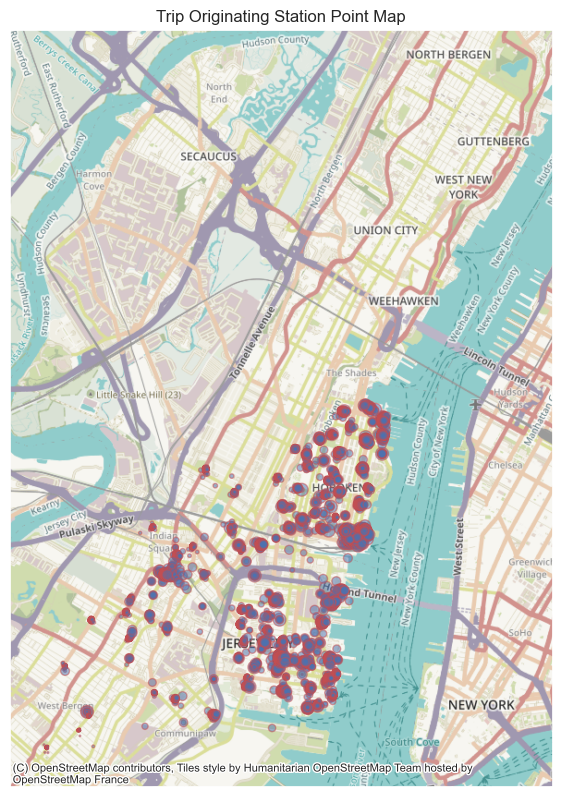

In [109]:
### Plotting Map for trip counts at Each Station
start_zones = start_zones.to_crs(epsg=3857)
ax = start_zones.plot(figsize=(7,10),alpha=0.5, edgecolor="r",markersize=start_zones['ride_id']/500)
ctx.add_basemap(ax)
ax.set_title("Trip Originating Station Point Map")
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

### POINT MAP OF TRIPS FROM END STATION

In [57]:
end_zones = te_cleaned.dissolve(
     by="end_station_id",
     as_index=False,
     aggfunc={
         "ride_id": "count",
     },
 )
end_zones.tail(1)

,end_station_id,geometry,ride_id
86,MTL-ECO5-LAB,POINT (-74.08896 40.74717),1


In [58]:
end_zones.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

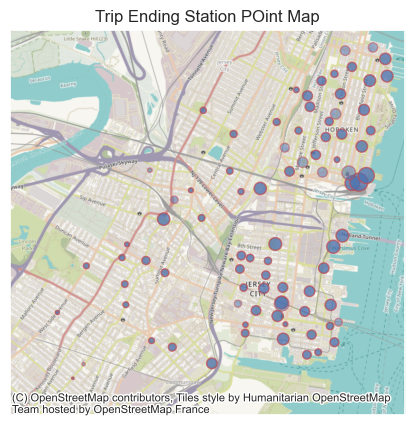

In [108]:
end_zones = end_zones.to_crs(epsg=3857)
ax = end_zones.plot(figsize=(8,5), alpha=0.5, edgecolor="r",markersize=end_zones['ride_id']/250)
ctx.add_basemap(ax)
ax.set_title("Trip Ending Station POint Map")
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
plt.show()
